<a href="https://colab.research.google.com/github/Pritijondhale97/Deep_Learning/blob/main/Binary_Classification_using_Keras_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary Classification
# New section

In [1]:
path = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/booking_train.csv"
import pandas as pd
df = pd.read_csv(path)
df.head()


,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


# Perform Basic Data Quality Checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

# Target feature: booking status

0- not confirmed
1-confirmed


In [3]:
df.shape

(42100, 19)

In [4]:

# Check for missing data
df.isna().sum()



,0
id,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [5]:
# Check for duplicated data
df.duplicated().sum()

np.int64(0)

# THere are no missing values nor any duplicated rows present in this data

# Separate x and y Features

In [6]:
df.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
X = df.drop(columns=["id","booking_status"])
Y = df[["booking_status"]]

In [8]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [9]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [10]:
Y.value_counts()

,count
booking_status,
0,25596
1,16504


<Axes: xlabel='booking_status'>

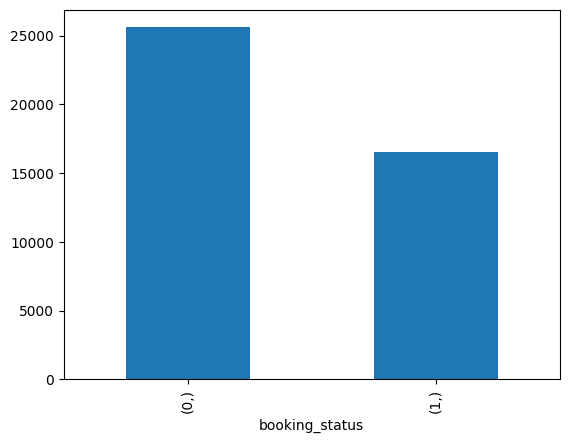

In [11]:
Y.value_counts().plot(kind="bar")

## Inbalanced dataset

# Consider a binary classification problem where you need to predict 2 classes

class A and class B
If your majority of data(biased) contains output target class A, in that case model learns only on basis of biased data.
As it receives very few datapoints for classB, its hard for the model to learn specification of classB.
class A: majority class
class B: minority class

# Binary Classification problem: how to handle imbalanced dataset

1. Ensemble techniques- very good to handle imbalanced dataset. Especially Random FOrest is the best one.
2. Oversampling of minority class(class B)=> extra samples will be generated for minority class B. Model => SMOTE
SMOTE: synthetic minority oversampling technique
3. Undersampling of majority class(class A)=> samples from the majority class(class A) will be removed randomly to result in a balanced data


# Data Preprocessing and Data cleaning

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



In [13]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"),StandardScaler()).set_output(transform="pandas")
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


# Perform train test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=21)



In [16]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
17408,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,-0.515173,0.630480,0.409661,0.143658,-1.001628,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,0.552579
24897,0.151040,-0.313454,0.130259,-0.278849,1.294624,-0.160945,-0.515173,0.063058,0.409661,0.143658,-0.776617,0.428551,-0.173408,-0.060506,-0.101479,0.068221,0.552579
18155,-1.753925,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,-1.281486,0.409661,-1.623525,0.123424,-1.149928,-0.173408,-0.060506,-0.101479,-0.755717,-0.737691
22920,-1.753925,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,-0.515173,-0.430353,0.409661,-0.563215,1.360982,0.428551,-0.173408,-0.060506,-0.101479,0.415567,-0.737691
18137,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,-0.541370,0.409661,-1.270088,1.023466,-1.149928,-0.173408,-0.060506,-0.101479,-0.796106,-0.737691


In [17]:
xtest.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
20351,0.151040,-0.313454,1.259332,-0.278849,-0.40702,-0.160945,-0.515173,-0.763405,-2.441040,1.203968,0.460940,-1.149928,-0.173408,-0.060506,-0.101479,-1.119219,-0.737691
21728,-1.753925,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,1.086885,0.409661,-0.563215,0.910961,-1.149928,-0.173408,-0.060506,-0.101479,0.684828,-0.737691
12697,0.151040,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,-0.775741,0.409661,0.850531,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.492610,0.552579
20136,2.056005,-0.313454,-0.998814,-0.979466,-0.40702,-0.160945,0.685890,-0.973105,0.409661,-0.209778,0.460940,0.428551,-0.173408,-0.060506,-0.101479,1.627240,1.842849
27760,-1.753925,-0.313454,-0.998814,-0.979466,-0.40702,-0.160945,-0.515173,-1.207475,0.409661,1.557404,-1.451649,-1.149928,-0.173408,-0.060506,-0.101479,-1.334628,-0.737691


In [18]:
ytrain.head()

,booking_status
17408,0
24897,0
18155,0
22920,1
18137,1


In [19]:
ytest.head()

,booking_status
20351,0
21728,0
12697,1
20136,0
27760,0


# Model building using Keras

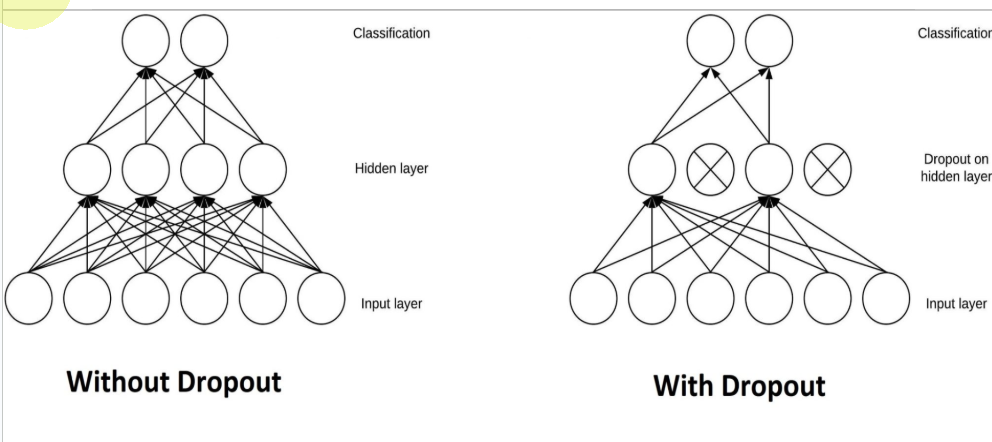


In [20]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout


In [21]:


xtrain.shape


(33680, 17)

In [22]:
xtrain.shape[1]


17

In [23]:
# Intialize the model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add the Hidden layer 1
model.add(Dense(units=64,activation="relu"))

# Add the Dropout layer1
model.add(Dropout(rate=0.3))

# Add the hidden layer 2
model.add(Dense(units=32,activation="relu"))

# Add the Dropout layer2
model.add(Dropout(rate=0.15))

# Add the output layer
model.add(Dense(units=1,activation="sigmoid"))

In [24]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])



In [26]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7004 - loss: 0.5575 - val_accuracy: 0.7781 - val_loss: 0.4652
Epoch 2/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7706 - loss: 0.4875 - val_accuracy: 0.7836 - val_loss: 0.4600
Epoch 3/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7843 - loss: 0.4702 - val_accuracy: 0.7834 - val_loss: 0.4580
Epoch 4/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7840 - loss: 0.4659 - val_accuracy: 0.7886 - val_loss: 0.4557
Epoch 5/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7864 - loss: 0.4638 - val_accuracy: 0.7920 - val_loss: 0.4548
Epoch 6/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7911 - loss: 0.4559 - val_accuracy: 0.7928 - val_loss: 0.4511
Epoch 7/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7917 - loss: 0.4547 - val_accuracy: 0.7939 - val_loss: 0.4512
Epoch 8/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7992 - loss: 0.4480 - val_accu

# New section

Evaluate the model

In [27]:
model.evaluate(xtrain,ytrain)


1053/1053 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8198 - loss: 0.3993


[0.40614575147628784, 0.8168942928314209]

In [28]:
model.evaluate(xtest,ytest)

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8047 - loss: 0.4322


[0.4361187815666199, 0.802612841129303]

plot the learning curve

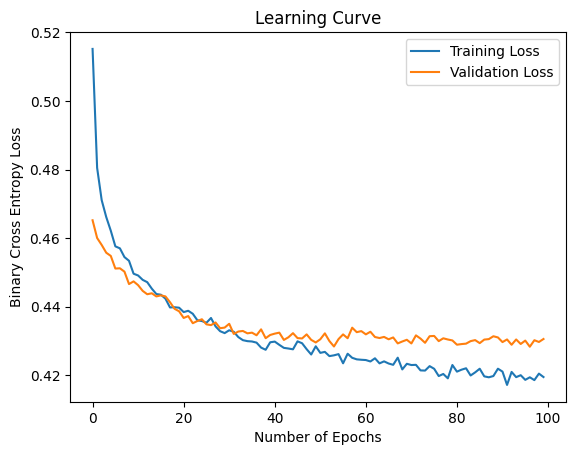

In [29]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Binary Cross Entropy Loss")
plt.legend()
plt.title("Learning Curve")
plt.show()

Considering this model for final preditions as it gives an accuracy of 80% for training and testing cases.

In [30]:

ypred_test = model.predict(xtest)
ypred_test

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.07083119],
       [0.79292357],
       [0.2912328 ],
       ...,
       [0.17522816],
       [0.7363456 ],
       [0.60490936]], dtype=float32)

In [31]:
#Output of model.predict(x) is in probability scenario


In [32]:
# The default threshold to determine the classes is 0.5


In [33]:
ypreds_final_test = [1 if i>0.5 else 0 for i in ypred_test]
ypreds_final_test[:5]

[0, 1, 0, 0, 0]

In [34]:
ytest.head()

,booking_status
20351,0
21728,0
12697,1
20136,0
27760,0


In [35]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,confusion_matrix
confusion_matrix(ytest,ypreds_final_test)

array([[4468,  628],
       [1034, 2290]])

In [36]:
print(classification_report(ytest,ypreds_final_test))


              precision    recall  f1-score   support

           0       0.81      0.88      0.84      5096
           1       0.78      0.69      0.73      3324

    accuracy                           0.80      8420
   macro avg       0.80      0.78      0.79      8420
weighted avg       0.80      0.80      0.80      8420



Save the model

In [37]:
from keras.models import load_model

In [38]:
model.save("Booking Status Model.keras")


In [39]:
m = load_model('/content/Booking Status Model.keras')
m.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,797 (38.27 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,532 (25.52 KB)

In [40]:
path2 = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/booking_test.csv"
xnew = pd.read_csv(path2)
xnew.head()


,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [41]:
x1 = xnew.drop(columns="id")
x1_pre = num_pipe.transform(x1)
x1_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [42]:
bookingstatus_preds = model.predict(x1_pre)
bookingstatus_preds[:5]


878/878 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.11437355],
       [0.07624026],
       [0.23838411],
       [0.17267531],
       [0.6025901 ]], dtype=float32)

In [43]:
bookingstatus = [1 if i>0.5 else 0 for i in bookingstatus_preds]
bookingstatus[:5]

[0, 0, 0, 0, 1]

In [44]:
xnew["Booking Status Predicted"] = bookingstatus
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Booking Status Predicted
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2,0
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1,0
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0,1


Save the results to a csv file

In [45]:
xnew.to_csv("BookingStatusResults.csv")

